In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import cv2 as cv  
import matplotlib.pyplot as plt
from tensorflow.python.keras.metrics import accuracy

In [2]:
data = tf.keras.datasets.mnist

The MNIST dataset is a large database of handwritten digits. It commonly used for training various image processing systems. 

MNIST is short for Modified National Institute of Standards and Technology database.

This dataset is used for training models to recognize handwritten digits. This has an application in scanning for handwritten pin-codes on letters.

In [3]:
(x_train,y_train),(x_test,y_test) = data.load_data()
# split the data in training set as tuple

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)

In [5]:
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [6]:
model= tf.keras.models.Sequential()

In [7]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. ... In other words, we put all the pixel data in one line and make connections with the final layer.

In [8]:
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))

A dense layer is a kind of hidden layer where every node is connected to every other node in the next layer.

In [9]:
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2687 - accuracy: 0.9217
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1124 - accuracy: 0.9645
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0749 - accuracy: 0.9758


As the number of epochs increases beyond 11, chances of overfitting of the model on training data increases.

In [11]:
loss , accuracy  = model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 0s 918us/step - loss: 0.0964 - accuracy: 0.9692
0.9692000150680542
0.09643067419528961


In [12]:
# for x in range(1,9):
#     img = cv.imread(f'{x}.png')[:,:,0]
#     img = np.array([img])
#     prediction = model.predict(img)
#     print('----------')
#     print('pred = ', np.argmax(prediction))
#     print('----------')
#     plt.imshow(img[0], cmap = plt.cm.binary)
#     plt.show()

----------
pred =  3
----------


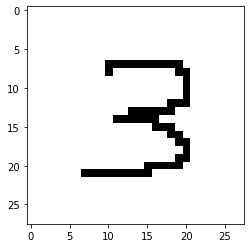

----------
pred =  4
----------


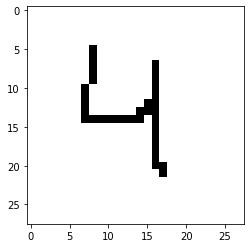

In [19]:
for x in range(1,3):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print('----------')
    print('pred = ', np.argmax(prediction))
    print('----------')
    plt.imshow(img[0], cmap = plt.cm.binary)
    plt.show()